In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import time
import sys
import matplotlib.pyplot as plt
import os
import csv

import const
import utils

%matplotlib inline

In [15]:
# Initialization
plt.rcParams["figure.figsize"]=[20,20]
dir_dataset = "F:/dataset_YYYYMMDD/"
dir_dataset_sub = "F:/dataset_YYYYMMDD_sub/"
dir_dataset_median_undirected = "F:/dataset_YYYYMMDD_median_undirected/"
dir_graph_undirected = "F:/graph_YYYYMMDD_undirected/"

In [16]:
def toStrYearMonth(year, month):
    if month < 10:
        return str(year) + "0" + str(month)
    else:
        return str(year) + str(month)
    
def toStrYearMonthDay(year, month, day):
    res = str(year)
    if month < 10:
        res = res + '0' + str(month)
    else:
        res = res + str(month)
    if day < 10:
        res = res + '0' + str(day)
    else:
        res = res + str(day)
    return res

def getNextYearMonth(year, month):
    month = month + 1
    if month > 12:
        month = 1
        year = year + 1
    return [year, month]

# Subset
Take top 20% frequent nodes.

In [24]:
def getFrequenct(dirName):
    if os.path.isdir(dirName):
        listOfFile = os.listdir(dirName)
        for year in range(2013, 2019, 1):
            nodes_freq = pd.Series([])
            for entry in listOfFile:
                if entry[:4] == str(year):
                    df_temp = pd.read_pickle(dirName + entry)
                    nodes_freq = nodes_freq.add(df_temp.IP_SRC.value_counts(), fill_value=0)
                    nodes_freq = nodes_freq.add(df_temp.IP_DST.value_counts(), fill_value=0)
                    print(entry)
            nodes_freq.to_pickle("F:/dataset_YYYYMMDD_sum/" + str(year) +".pkl")
            
        nodes_freq = pd.Series([])
        for year in range(2013, 2019, 1):
            nodes_freq = nodes_freq.add(pd.read_pickle("F:/dataset_YYYYMMDD_sum/" + str(year) +".pkl"), fill_value=0)
        nodes_freq.to_pickle("F:/dataset_YYYYMMDD_sum/whole.pkl")
        nodes_freq = nodes_freq.sort_values(ascending=False)
        return nodes_freq
        print('getFrequency in ' + dirName + ' succeed.')
    else:
        print('getFrequency in ' + dirName + ' failed.')
        return []

In [25]:
nodes_freq_desc = getFrequenct(dir_dataset)

20130701_1.pkl
20130701_2.pkl
20130701_3.pkl
20130801_1.pkl
20130801_2.pkl
20130801_3.pkl
20130901_1.pkl
20130901_2.pkl
20130901_3.pkl
20131001_1.pkl
20131001_2.pkl
20131001_3.pkl
20131101_1.pkl
20131101_2.pkl
20131101_3.pkl
20131201_1.pkl
20131201_2.pkl
20131201_3.pkl
20140101_1.pkl
20140101_2.pkl
20140101_3.pkl
20140201_1.pkl
20140201_2.pkl
20140201_3.pkl
20140301_1.pkl
20140301_2.pkl
20140301_3.pkl
20140401_1.pkl
20140401_2.pkl
20140401_3.pkl
20140501_1.pkl
20140501_2.pkl
20140501_3.pkl
20140601_1.pkl
20140601_2.pkl
20140601_3.pkl
20140701_1.pkl
20140701_2.pkl
20140701_3.pkl
20140801_1.pkl
20140801_2.pkl
20140801_3.pkl
20140912_1.pkl
20140912_2.pkl
20140912_3.pkl
20141001_1.pkl
20141001_2.pkl
20141001_3.pkl
20141101_1.pkl
20141101_2.pkl
20141101_3.pkl
20141201_1.pkl
20141201_2.pkl
20141201_3.pkl
20150101_1.pkl
20150101_2.pkl
20150101_3.pkl
20150201_1.pkl
20150201_2.pkl
20150201_3.pkl
20150301_1.pkl
20150301_2.pkl
20150301_3.pkl
20150401_1.pkl
20150401_2.pkl
20150401_3.pkl
20150501_1

In [28]:
# nodes_freq_desc = pd.read_pickle("F:/dataset_YYYYMMDD_sum/whole.pkl").sort_values(ascending=False)

In [30]:
nodes_freq_top20 = nodes_freq_desc[:int(0.2*(len(nodes_freq_desc)))]
nodes_freq_top20.to_pickle("F:/dataset_YYYYMMDD_sum/top20.pkl")

44804470    37453548.0
22202066    36630951.0
22121800    32264036.0
22164176    30447825.0
22830798    30371559.0
               ...    
38253414           1.0
38253415           1.0
27979009           1.0
38253416           1.0
27979008           1.0
Length: 13413882, dtype: float64

In [38]:
nodes_top20_dict = nodes_freq_top20.to_dict()

In [39]:
nodes_top20_dict

{'44804470': 37453548.0,
 '22202066': 36630951.0,
 '22121800': 32264036.0,
 '22164176': 30447825.0,
 '22830798': 30371559.0,
 '44780322': 30216517.0,
 '22164177': 30050200.0,
 '22164178': 29725084.0,
 '3992078': 29506394.0,
 '44755382': 28409302.0,
 '1389043': 28101781.0,
 '22082625': 27593470.0,
 '22830799': 27365150.0,
 '22102675': 26814973.0,
 '6310356': 26207955.0,
 '44912403': 26136099.0,
 '2': 23352562.0,
 '295473': 23158122.0,
 '25978933': 23003580.0,
 '11531430': 22115118.0,
 '44912402': 21777764.0,
 '27104684': 21002583.0,
 '348785': 20688668.0,
 '295476': 20277365.0,
 '22143490': 20202688.0,
 '22143491': 20127683.0,
 '2954084': 20030855.0,
 '7407665': 20023110.0,
 '22102674': 19635361.0,
 '2954085': 19412701.0,
 '52798610': 19410432.0,
 44804469: 18877103.0,
 '22102676': 18849694.0,
 '25132299': 18620188.0,
 22202065: 18521545.0,
 '44755383': 18510895.0,
 '7102510': 18182571.0,
 '9068377': 17941291.0,
 '4377768': 17163078.0,
 '22121801': 16937512.0,
 '7536720': 16785987.0,
 '

## Take Subset for each dataset

In [5]:
nodes_freq_top20 = pd.read_pickle("F:/dataset_YYYYMMDD_sum/top20.pkl").to_dict()
nodes_top20_dict = nodes_freq_top20

In [23]:
def getSubsetByNodes(dirOri, dirDst, inNodes):
    if os.path.isdir(dirOri):
        listOfFile = os.listdir(dirOri)
        for entry in listOfFile:
            df_temp = pd.read_pickle(dirOri + entry)
            df_temp = df_temp.loc[df_temp['IP_SRC'].isin(inNodes.index) & df_temp['IP_DST'].isin(inNodes.index)]
            df_temp.to_pickle(dirDst + entry)
            print(entry)
            
        print('getSubsetByNodes in ' + dirName + ' succeed.')
    else:
        print('getSubsetByNodes in ' + dirName + ' failed.')

In [24]:
getSubsetByNodes(dir_dataset, dir_dataset_sub, nodes_freq_top20)

20130701_1.pkl
20130701_2.pkl
20130701_3.pkl
20130801_1.pkl
20130801_2.pkl
20130801_3.pkl
20130901_1.pkl
20130901_2.pkl
20130901_3.pkl
20131001_1.pkl
20131001_2.pkl
20131001_3.pkl
20131101_1.pkl
20131101_2.pkl
20131101_3.pkl
20131201_1.pkl
20131201_2.pkl
20131201_3.pkl
20140101_1.pkl
20140101_2.pkl
20140101_3.pkl
20140201_1.pkl
20140201_2.pkl
20140201_3.pkl
20140301_1.pkl
20140301_2.pkl
20140301_3.pkl
20140401_1.pkl
20140401_2.pkl
20140401_3.pkl
20140501_1.pkl
20140501_2.pkl
20140501_3.pkl
20140601_1.pkl
20140601_2.pkl
20140601_3.pkl
20140701_1.pkl
20140701_2.pkl
20140701_3.pkl
20140801_1.pkl
20140801_2.pkl
20140801_3.pkl
20140912_1.pkl
20140912_2.pkl
20140912_3.pkl
20141001_1.pkl
20141001_2.pkl
20141001_3.pkl
20141101_1.pkl
20141101_2.pkl
20141101_3.pkl
20141201_1.pkl
20141201_2.pkl
20141201_3.pkl
20150101_1.pkl
20150101_2.pkl
20150101_3.pkl
20150201_1.pkl
20150201_2.pkl
20150201_3.pkl
20150301_1.pkl
20150301_2.pkl
20150301_3.pkl
20150401_1.pkl
20150401_2.pkl
20150401_3.pkl
20150501_1

NameError: name 'dirName' is not defined

## Get subset of median of RTT

In [4]:
year_begin = 2013
month_begin = 7
year_end = 2018
month_end = 8
day = 1

In [5]:
def toCheckString(a, b):
    if a < b:
        return a + "_" + b
    else:
        return b + "_" + a

In [57]:
year_iter = 2013
month_iter = 7
while year_iter < year_end or (year_iter == year_end and month_iter <= month_end):
    
    print(toStrYearMonth(year_iter, month_iter))
    
    strOut = ""
    
    day = 1
    
    if year_iter == 2014 and month_iter == 9:
        day = 12
    elif year_iter == 2016 and month_iter == 7:
        day = 2
        
    list_df = [pd.read_pickle(dir_dataset_sub + toStrYearMonthDay(year_iter, month_iter, day) + "_" + str(id_team + 1) + ".pkl") for id_team in range(3) if os.path.isfile(dir_dataset + toStrYearMonthDay(year_iter, month_iter, day) + "_" + str(id_team + 1) + ".pkl")]
    
    df_ori = pd.concat(
        list_df, 
        ignore_index=True
    )
    
    strOut = strOut + str(len(df_ori)) + " -> "
    df_ori['IP_DST'] = df_ori['IP_DST'].astype(int)
    df_ori['IP_SRC'] = df_ori['IP_SRC'].astype(int)
    df_ordered = df_ori[['RTT']].copy()
    df_ordered['SRC'] = df_ori[['IP_SRC', 'IP_DST']].min(axis=1)
    df_ordered['DST'] = df_ori[['IP_SRC', 'IP_DST']].max(axis=1)
    df_ordered_m = df_ordered.groupby(['SRC', 'DST'], as_index=False).median()
    df_ordered_m.to_pickle(dir_dataset_median_undirected + toStrYearMonth(year_iter, month_iter) + ".pkl")
    strOut = strOut + str(len(df_ordered_m))
    
    print(strOut)
    
    [year_iter, month_iter] = getNextYearMonth(year_iter, month_iter)

201307
76454853 -> 1654163
201308
67131286 -> 1623930
201309
61281074 -> 1522925
201310
59926518 -> 1539171
201311
67154472 -> 1604893
201312
67108547 -> 1619260
201401
75736923 -> 1742544
201402
74756680 -> 1769511
201403
67654917 -> 1830897
201404
76557547 -> 1910557
201405
75850974 -> 1798315
201406
63269487 -> 1631138
201407
71230115 -> 1892805
201408
79751002 -> 1868658
201409
58518428 -> 1641607
201410
70043452 -> 2075448
201411
72826091 -> 2244554
201412
68150404 -> 2125421
201501
63012227 -> 2052058
201502
63208066 -> 1987648
201503
69001126 -> 2119157
201504
75502502 -> 2284776
201505
70428519 -> 2201980
201506
83361964 -> 2504053
201507
91962677 -> 2661881
201508
36200913 -> 1629600
201509
82798093 -> 2443973
201510
85553767 -> 2480887
201511
88549209 -> 2293758
201512
92888854 -> 2344333
201601
82094580 -> 2251126
201602
82624621 -> 2302222
201603
90798492 -> 2442098
201604
75129940 -> 2228711
201605
88045819 -> 2394469
201606
94501537 -> 2460968
201607
86053600 -> 2307914
2

## Dataset to Graph

In [59]:
year_iter = 2013
month_iter = 7

In [63]:
def get_G(df_G):
    G = nx.Graph()

    # add edges
    for index, row in df_G.iterrows():
        if not row['SRC'] in G.nodes:
            G.add_node(int(row['SRC']))
        if not row['DST'] in G.nodes:
            G.add_node(int(row['DST']))
        G.add_edge(int(row['SRC']), int(row['DST']), weight = np.float64(row['RTT']))
    
    return G

In [64]:
while year_iter < year_end or (year_iter == year_end and month_iter <= month_end):
    df_G = pd.read_pickle(dir_dataset_median_undirected + toStrYearMonth(year_iter, month_iter) + ".pkl")
    
    path_graph = dir_graph_undirected + toStrYearMonth(year_iter, month_iter) + ".gexf"

    nx.write_gexf(get_G(df_G), path_graph)
    
    print(toStrYearMonth(year_iter, month_iter) + ".gexf")
    
    [year_iter, month_iter] = getNextYearMonth(year_iter, month_iter)

201307.gexf
201308.gexf
201309.gexf
201310.gexf
201311.gexf
201312.gexf
201401.gexf
201402.gexf
201403.gexf
201404.gexf
201405.gexf
201406.gexf
201407.gexf
201408.gexf
201409.gexf
201410.gexf
201411.gexf
201412.gexf
201501.gexf
201502.gexf
201503.gexf
201504.gexf
201505.gexf
201506.gexf
201507.gexf
201508.gexf
201509.gexf
201510.gexf
201511.gexf
201512.gexf
201601.gexf
201602.gexf
201603.gexf
201604.gexf
201605.gexf
201606.gexf
201607.gexf
201608.gexf
201609.gexf
201610.gexf
201611.gexf
201612.gexf
201701.gexf
201702.gexf
201703.gexf
201704.gexf
201705.gexf
201706.gexf
201707.gexf
201708.gexf
201709.gexf
201710.gexf
201711.gexf
201712.gexf
201801.gexf
201802.gexf
201803.gexf
201804.gexf
201805.gexf
201806.gexf
201807.gexf
201808.gexf


# Prepare .csv for TGN

In [6]:
def toCSVByYearForTGN(inYear):
    df_list = []
    for month_iter in range(12):
        filename = utils.toStrYearMonth(inYear, month_iter + 1)
        if os.path.isfile(const.DIR_DATASET_MEDIAN_UNDIRECTED + filename + ".pkl"):
            df_temp = pd.read_pickle(const.DIR_DATASET_MEDIAN_UNDIRECTED + filename + ".pkl")
        
            df_item = pd.DataFrame()
            df_item['user_id'] = df_temp['SRC']
            df_item['item_id'] = df_temp['DST']
            df_item['timestamp'] = utils.getTimestamp(inYear, month_iter + 1)
            df_item['state_label'] = 0
            df_item['comma_separated_list_of_features'] = df_temp.RTT        
            df_list.append(df_item)

            print("Read " + filename + ".pkl")
    
    pd.concat(df_list, ignore_index=True).to_csv(const.DIR_CSV_FOR_TGN + str(inYear) + ".csv", encoding='utf-8', index=False)

In [7]:
for iter_year in [2013, 2014, 2015, 2016, 2017, 2018]:
    toCSVByYearForTGN(iter_year)

Read 201307.pkl
Read 201308.pkl
Read 201309.pkl
Read 201310.pkl
Read 201311.pkl
Read 201312.pkl
Read 201401.pkl
Read 201402.pkl
Read 201403.pkl
Read 201404.pkl
Read 201405.pkl
Read 201406.pkl
Read 201407.pkl
Read 201408.pkl
Read 201409.pkl
Read 201410.pkl
Read 201411.pkl
Read 201412.pkl
Read 201501.pkl
Read 201502.pkl
Read 201503.pkl
Read 201504.pkl
Read 201505.pkl
Read 201506.pkl
Read 201507.pkl
Read 201508.pkl
Read 201509.pkl
Read 201510.pkl
Read 201511.pkl
Read 201512.pkl
Read 201601.pkl
Read 201602.pkl
Read 201603.pkl
Read 201604.pkl
Read 201605.pkl
Read 201606.pkl
Read 201607.pkl
Read 201608.pkl
Read 201609.pkl
Read 201610.pkl
Read 201611.pkl
Read 201612.pkl
Read 201701.pkl
Read 201702.pkl
Read 201703.pkl
Read 201704.pkl
Read 201705.pkl
Read 201706.pkl
Read 201707.pkl
Read 201708.pkl
Read 201709.pkl
Read 201710.pkl
Read 201711.pkl
Read 201712.pkl
Read 201801.pkl
Read 201802.pkl
Read 201803.pkl
Read 201804.pkl
Read 201805.pkl
Read 201806.pkl
Read 201807.pkl
Read 201808.pkl


check all data

In [6]:
def check(year, i_begin, i_end):
    print("Check data in " + str(year) + "...")
    df_test = pd.read_csv("F:/csv_TGN/" + str(year) + ".csv")
    for i in range(i_begin, i_end + 1, 1):
        if not len(df_test[df_test.timestamp == i]) == len(pd.read_pickle("F:/dataset_YYYYMMDD_median_undirected/" + utils.timestampToYYYYMM(i) + ".pkl")):
            print(utils.timestampToYYYYMM(i))

In [10]:
check(2013, 0, 5)
check(2014, 6, 17)
check(2015, 18, 29)
check(2016, 30, 41)
check(2017, 42, 53)
check(2018, 54, 61)

Check data in 2013...
Check data in 2014...
Check data in 2015...
Check data in 2016...
Check data in 2017...
Check data in 2018...


In [16]:
def toCSVForTGN():
    df_list = []
    for year_iter in range(2013, 2019, 1):
        for month_iter in range(12):
            filename = utils.toStrYearMonth(year_iter, month_iter + 1)
            if os.path.isfile(const.DIR_DATASET_MEDIAN_UNDIRECTED + filename + ".pkl"):
                df_temp = pd.read_pickle(const.DIR_DATASET_MEDIAN_UNDIRECTED + filename + ".pkl")

                df_item = pd.DataFrame()
                df_item['user_id'] = df_temp['SRC']
                df_item['item_id'] = df_temp['DST']
                df_item['timestamp'] = utils.getTimestamp(year_iter, month_iter + 1)
                df_item['state_label'] = 0
                df_item['comma_separated_list_of_features'] = df_temp.RTT        
                df_list.append(df_item)

                print(filename + ".pkl")
    
    pd.concat(df_list, ignore_index=True).to_csv(const.DIR_CSV_FOR_TGN + "whole.csv", encoding='utf-8', index=False)

In [17]:
toCSVForTGN()

201307.pkl
201308.pkl
201309.pkl
201310.pkl
201311.pkl
201312.pkl
201401.pkl
201402.pkl
201403.pkl
201404.pkl
201405.pkl
201406.pkl
201407.pkl
201408.pkl
201409.pkl
201410.pkl
201411.pkl
201412.pkl
201501.pkl
201502.pkl
201503.pkl
201504.pkl
201505.pkl
201506.pkl
201507.pkl
201508.pkl
201509.pkl
201510.pkl
201511.pkl
201512.pkl
201601.pkl
201602.pkl
201603.pkl
201604.pkl
201605.pkl
201606.pkl
201607.pkl
201608.pkl
201609.pkl
201610.pkl
201611.pkl
201612.pkl
201701.pkl
201702.pkl
201703.pkl
201704.pkl
201705.pkl
201706.pkl
201707.pkl
201708.pkl
201709.pkl
201710.pkl
201711.pkl
201712.pkl
201801.pkl
201802.pkl
201803.pkl
201804.pkl
201805.pkl
201806.pkl
201807.pkl
201808.pkl


In [18]:
import time
start_time = time.time()
df = pd.read_csv(const.DIR_CSV_FOR_TGN + "whole.csv")
print("--- %s seconds ---" % (time.time() - start_time))

--- 50.303568840026855 seconds ---


In [19]:
len(df)

135904820

In [20]:
df.head(-5)

,user_id,item_id,timestamp,state_label,comma_separated_list_of_features
0,0,1,0,0,445.0
1,1,2,0,0,540.0
2,1,126171,0,0,329.0
3,2,3,0,0,402.0
4,2,715,0,0,498.5
...,...,...,...,...,...
135904810,65376435,65376436,61,0,150057.0
135904811,65376436,65376437,61,0,150933.0
135904812,65376592,65376593,61,0,165510.0
135904813,65376603,65376603,61,0,3122430.0


# Run the first three months for racci-curvature

In [12]:
import networkx as nx
from GraphRicciCurvature.OllivierRicci import OllivierRicci
import time

In [13]:
start_time = time.time()
G_test = nx.read_gexf("graph_network/201307.gexf", node_type=int, relabel=False)
print("--- %s seconds ---" % (time.time() - start_time))

--- 52.40448212623596 seconds ---


In [14]:
nx.info(G_test)

'Name: \nType: Graph\nNumber of nodes: 809454\nNumber of edges: 1654163\nAverage degree:   4.0871'

In [15]:
# @n_sample: int
# Get a subgraph with n_sample nodes.
def G_sample_nodes(G, n_sample):
    
    return G.subgraph(list(G.nodes)[0:n_sample])

In [16]:
G_test_80 = G_sample_nodes(G_test, 80).copy()

In [17]:
nx.info(G_test_80)

'Name: \nType: Graph\nNumber of nodes: 80\nNumber of edges: 169\nAverage degree:   4.2250'

In [18]:
G_test_80.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 18955, 13, 20, 32, 41, 1587, 53, 59, 232513, 213571, 70, 150600, 40016, 33362, 2143, 100, 672875, 118, 119, 2167, 100475, 516221, 292484, 8839, 650, 113805, 1688, 37025, 680, 417461, 192, 120517, 715, 719, 214, 126171, 8944, 756, 559880, 240394, 81682, 281, 2334, 309027, 47399, 58158, 741702, 327, 185675, 333, 11091, 8535, 876, 393073, 71537, 75141, 78743, 527257, 1458, 320948, 109501, 845766, 466, 467, 58339, 241131, 1005, 255473, 2304505, 5628))

In [30]:
G_test_80.edges

EdgeView([(0, 1), (1, 2), (1, 126171), (2, 3), (2, 715), (3, 4), (3, 32), (3, 53), (3, 59), (3, 5628), (3, 8944), (3, 11091), (3, 33362), (3, 78743), (3, 109501), (4, 5), (4, 6), (4, 70), (4, 281), (4, 40016), (4, 47399), (4, 58158), (4, 58339), (4, 113805), (4, 232513), (5, 6), (5, 18955), (5, 37025), (5, 75141), (5, 81682), (5, 100475), (5, 120517), (5, 150600), (5, 185675), (5, 213571), (5, 232513), (5, 240394), (5, 241131), (5, 255473), (5, 292484), (5, 309027), (5, 320948), (5, 393073), (5, 417461), (5, 516221), (5, 527257), (5, 559880), (5, 672875), (5, 741702), (5, 845766), (5, 2304505), (6, 7), (6, 13), (6, 20), (6, 118), (6, 8535), (6, 8839), (6, 71537), (7, 8), (7, 9), (7, 41), (7, 100), (7, 119), (7, 192), (7, 214), (7, 327), (7, 333), (7, 466), (7, 467), (7, 650), (7, 680), (7, 719), (7, 756), (7, 876), (7, 1005), (7, 1458), (7, 1587), (7, 1688), (7, 2143), (7, 2167), (7, 2334), (7, 8839), (8, 9), (8, 119), (8, 214), (8, 327), (8, 650), (8, 680), (8, 719), (8, 756), (8, 876

In [34]:
list_weights = [G_test_80.edges[(n1, n2)]["weight"] for n1, n2 in G_test_80.edges]

In [35]:
list_weights

[445.0,
 540.0,
 329.0,
 402.0,
 498.5,
 4721.0,
 4523.0,
 436.0,
 4529.0,
 18820.0,
 442.0,
 1112.0,
 6526.5,
 3709.0,
 452.5,
 19087.0,
 14069.0,
 15809.0,
 42336.0,
 5141.0,
 4660.0,
 4764.0,
 6492.0,
 4722.5,
 9974.0,
 14073.0,
 40729.0,
 42707.0,
 49765.0,
 77601.0,
 58453.0,
 8605.0,
 57047.0,
 46990.0,
 48107.0,
 45836.0,
 62225.0,
 64994.0,
 51915.0,
 62112.0,
 52144.0,
 48295.0,
 44823.0,
 52266.0,
 45448.0,
 96670.0,
 67880.0,
 47706.0,
 62894.0,
 59087.5,
 34255.0,
 13978.0,
 13957.0,
 13985.0,
 13947.0,
 15460.0,
 13917.0,
 116162.0,
 13883.0,
 13948.0,
 119118.0,
 125364.0,
 22657.0,
 14214.0,
 14908.5,
 14198.5,
 131717.0,
 13790.0,
 131193.5,
 14887.0,
 14208.0,
 13929.0,
 13966.5,
 14300.0,
 13660.0,
 14068.0,
 13988.0,
 14116.0,
 21129.0,
 13911.0,
 21392.0,
 28940.0,
 13995.0,
 23585.0,
 14947.0,
 14201.0,
 14936.0,
 14208.0,
 13855.0,
 13924.0,
 14330.0,
 13982.5,
 21395.0,
 14011.0,
 13951.0,
 13974.0,
 53675.0,
 134308.0,
 22643.5,
 14931.5,
 14197.0,
 129656.0,
 1

(array([8.98931236e-06, 7.53942327e-07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.79955636e-08]),
 array([3.2900000e+02, 1.0235680e+05, 2.0438460e+05, 3.0641240e+05,
        4.0844020e+05, 5.1046800e+05, 6.1249580e+05, 7.1452360e+05,
        8.1655140e+05, 9.1857920e+05, 1.0206070e+06, 1.1226348e+06,
        1.2246626e+06, 1.3266904e+06, 1.4287182e+06, 1.5307460e+06,
        1.6327738e+06, 1.7348016e+06, 1.8368294e+06, 1.9388572e+06,
        2.0408850e+06, 2.1429128e+06, 2.2449406e+06, 2.3469684e+06,
        2.4489962e+06, 2.5510240e+06, 2.653051

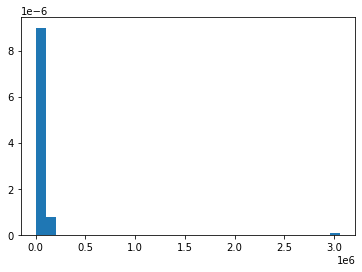

In [2]:
s = [445.0,
 540.0,
 329.0,
 402.0,
 498.5,
 4721.0,
 4523.0,
 436.0,
 4529.0,
 18820.0,
 442.0,
 1112.0,
 6526.5,
 3709.0,
 452.5,
 19087.0,
 14069.0,
 15809.0,
 42336.0,
 5141.0,
 4660.0,
 4764.0,
 6492.0,
 4722.5,
 9974.0,
 14073.0,
 40729.0,
 42707.0,
 49765.0,
 77601.0,
 58453.0,
 8605.0,
 57047.0,
 46990.0,
 48107.0,
 45836.0,
 62225.0,
 64994.0,
 51915.0,
 62112.0,
 52144.0,
 48295.0,
 44823.0,
 52266.0,
 45448.0,
 96670.0,
 67880.0,
 47706.0,
 62894.0,
 59087.5,
 34255.0,
 13978.0,
 13957.0,
 13985.0,
 13947.0,
 15460.0,
 13917.0,
 116162.0,
 13883.0,
 13948.0,
 119118.0,
 125364.0,
 22657.0,
 14214.0,
 14908.5,
 14198.5,
 131717.0,
 13790.0,
 131193.5,
 14887.0,
 14208.0,
 13929.0,
 13966.5,
 14300.0,
 13660.0,
 14068.0,
 13988.0,
 14116.0,
 21129.0,
 13911.0,
 21392.0,
 28940.0,
 13995.0,
 23585.0,
 14947.0,
 14201.0,
 14936.0,
 14208.0,
 13855.0,
 13924.0,
 14330.0,
 13982.5,
 21395.0,
 14011.0,
 13951.0,
 13974.0,
 53675.0,
 134308.0,
 22643.5,
 14931.5,
 14197.0,
 129656.0,
 121857.5,
 14862.5,
 14177.0,
 13907.0,
 13987.0,
 14325.0,
 14014.0,
 14125.0,
 21041.0,
 13893.0,
 21394.0,
 74165.0,
 22657.5,
 14976.0,
 14196.0,
 128811.5,
 130884.0,
 14904.0,
 14212.5,
 13957.0,
 13983.0,
 14314.5,
 13973.0,
 14284.5,
 20975.0,
 13906.5,
 21392.5,
 15807.0,
 4554.0,
 13992.0,
 4550.0,
 48554.5,
 51435.0,
 54699.5,
 48356.0,
 62461.0,
 57446.0,
 40647.0,
 21994.0,
 47353.5,
 20339.0,
 21103.0,
 21063.0,
 131005.0,
 53881.0,
 22627.0,
 14939.0,
 14207.0,
 130751.0,
 130232.0,
 14911.0,
 14178.0,
 13920.5,
 13993.0,
 14325.0,
 14318.0,
 13926.0,
 21375.5,
 13915.0,
 14180.0,
 48653.0,
 384.0,
 3061163.0,
 20877.0,
 53978.0, 57342.5,53884.0]
plt.hist(s, bins=30, density=True) 

In [29]:
G_test_80[(0,1)]

KeyError: (0, 1)

In [ ]:
G_test_8094 = nx.subgraph(G_test, 8094)
G_test_80945 = nx.subgraph(G_test, 80945)

In [9]:
G_test_curvature = G_test_80

In [ ]:
[(0.0, 5), (0.0, 21)]

In [11]:
G_test_curvature.edges[(0,5)]['weight']

In [10]:
start_time = time.time()

orc = OllivierRicci(G_test_curvature, alpha=0.5, verbose="INFO")

print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()

orc.compute_ricci_curvature()
print("Network in 201307: The Ollivier-Ricci curvature of edge (0,1) is %f" % orc.G[0][1]["ricciCurvature"])

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0009949207305908203 seconds ---


--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vws

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_a

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
--- Logging error ---
--- Logging error ---
--- Logging error ---
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 4), (0.0, 6), (0.0, 10), (0.0, 21), (0.0, 19), (0.0, 18), (0.0, 30), (0.0, 32), (0.0, 37), (0.0, 31), (0.0, 48), (0.0, 26), (0.0, 49), (0.0, 75), (0.0, 77), (0.0, 41), (0.0, 53), (0.0, 69), (0.0, 63), (0.0, 65), (0.0, 39), (0.0, 67), (0.0, 58), (0.0, 50), (0.0, 56), (0.0, 71), (0.0, 78)],)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.p

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nod

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(proces

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 4), (0.0, 21)],)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 0), (0.0, 2), (0.0, 45)],)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:364: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / np.dot(Kp, v)
/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:363: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, KtransposeU)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)
/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:363: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, Ktransp

/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:364: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / np.dot(Kp, v)




0

--- Logging error ---
--- Logging error ---
--- Logging error ---


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vwslz/anaconda3/env

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/vwslz/anaconda3/envs/network/lib

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/n

/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:363: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, KtransposeU)


Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)


0
0

--- Logging error ---


--- Logging error ---
Traceback (most recent call last):


--- Logging error ---
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__in

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vw

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/co

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/n

/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:364: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / np.dot(Kp, v)
/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ot/bregman.py:364: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / np.dot(Kp, v)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 4), (0.0, 5)],)



0


--- Logging error ---


--- Logging error ---
--- Logging error ---
Traceback (most recent call last):
--- Logging error ---
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anac

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/co

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/n

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 2), (0.0, 4), (0.0, 13), (0.0, 16), (0.0, 17), (0.0, 79), (0.0, 46), (0.0, 60), (0.0, 23), (0.0, 66), (0.0, 70)],)


Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5), (0.0, 21)],)
--- Logging error ---


Traceback (most recent call last):


 0 

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


0
0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


--- Logging error ---


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
--- Logging error ---
Traceback (most recent call last):
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Traceback (most recent call last):
TypeError: not all arguments converted during string formatting
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
Call 

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ge

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 138, in _distribute_densities
    x, source_topknbr = _get_single_node_neighbors_distributions(source, "successors")
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3), (0.0, 5), (0.0, 6), (0.0, 20), (0.0, 18), (0.0, 22), (0.0, 54), (0.0, 55), (0.0, 74), (0.0, 51), (0.0, 35)],)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 2), (0.0, 55)],)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)
--- Logging error ---
--- Logging error ---


Traceback (most recent call last):


Traceback (most recent call last):


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
--- Logging error ---
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Traceback (most recent call last):
Traceback (most recent call last):
Call stack:
TypeError: not all arguments converted during string formatting
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", l

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/pyth

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "<ipython-input-10-dc8078b4c222>"

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 75, in _launch
    code = process_obj._bootstrap(parent_sentinel=child_r)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anac

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


 0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


0


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


--- Logging error ---
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3), (0.0, 5), (0.0, 6), (0.0, 20), (0.0, 18), (0.0, 22), (0.0, 54), (0.0, 55), (0.0, 74), (0.0, 51), (0.0, 35)],)
--- Logging error ---
Traceback (most recent call last):


Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
--- Logging error ---
TypeError: not all arguments converted during string formatting
TypeError: not all arguments converted during string formatting
Traceback (most recent call last):
Traceback (most recent call last):
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init_

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/networ

  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


00

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)
--- Logging error ---
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


Traceback (most recent call last):
Traceback (most recent call last):
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3), (0.0, 20), (0.0, 55)],)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


0

--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args


Traceback (most recent call last):
TypeError: not all arguments converted during string formatting
TypeError: not all arguments converted during string formatting
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Call stack:
Call stack:
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.p

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/

  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vws

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/context.py", line 276, in _Popen
    return Popen(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
   

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)


0

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
--- Logging error ---
--- Logging error ---


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
Traceback (most recent call last):
Traceback (most recent call last):


0

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3)],)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
--- Logging error ---


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
Traceback (most recent call last):


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
--- Logging error ---
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/vwslz/anaconda3/envs/network/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/en

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 514, in _compute_ricci_curvature
    edge_ricci = _compute_ricci_curvature_edges(G, weight=weight, **kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    retu

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)


0

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")
--- Logging error ---


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3), (0.0, 55)],)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
TypeError: not all arguments converted during string formatting


TypeError: not all arguments converted during string formatting
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
Call stack:
--- Logging error ---
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/en

  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 514, in _c

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 75, in _launch
    code = process_obj._bootstrap(parent_sentinel=child_r)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)


0

Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5), (0.0, 21)],)


0


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


--- Logging error ---
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
Traceback (most recent call last):


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3)],)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
TypeError: not all arguments converted during string formatting


TypeError: not all arguments converted during string formatting
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
Call stack:
--- Logging error ---
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/home/vwslz/anaconda3/env

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/vwslz/anaconda3/en

  File "<ipython-input-10-dc8078b4c222>", line 9, in <module>
    orc.compute_ricci_curvature()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 514, in _c

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, self.Process,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/popen_fork.py", line 75, in _launch
  

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)


 0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 354, in _wrap_compute_single_edge
    return _compute_ricci_curvature_single_edge(*stuff)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 5)],)


0


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 342, in _compute_ricci_curvature_single_edge
    x, y, d = _distribute_densities(source, target)


--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 141, in _distribute_densities
    y, target_topknbr = _get_single_node_neighbors_distributions(target, "successors")


--- Logging error ---
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 104, in _get_single_node_neighbors_distributions
    logger.warning("Neighbor weight sum too small, list:", heap_weight_node_pair)
Traceback (most recent call last):


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
Message: 'Neighbor weight sum too small, list:'
Arguments: ([(0.0, 3)],)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()


  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args


0

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
TypeError: not all arguments converted during string formatting


TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
Call stack:
--- Logging error ---
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
Traceback (most recent call last):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
  File "/home/vwslz/anaconda3/envs/network/

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/v

  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 759, in compute_ricci_curvature
    self.G = _compute_ricci_curvature(G=self.G, weight=self.weight,
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/vwslz/anaconda3/envs/network/lib/python3.8/site-packages/GraphRicciCurvature/OllivierRicci.py", line 514, in _compute_ricci_curvature
    edge_ricci = _compute_ricci_curvature_ed

In [ ]:
start_time = time.time()

frc = FormanRicci(G_test_curvature)

print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()

frc.compute_ricci_curvature()
print("Network in 201307: The Forman-Ricci curvature of edge (0,1) is %f" % frc.G[0][1]["formanCurvature"])

print("--- %s seconds ---" % (time.time() - start_time))

### Previous code

In [2]:
import networkx as nx
from GraphRicciCurvature.OllivierRicci import OllivierRicci
import time

In [21]:
dir_graph_pickle = "../NetworkEvolution/graph_pickle/75_197/"
dir_graph_BA = "graphs_from_BA_model/"

G_art = []

for i in range(16):
    G_art.append(nx.read_gpickle(dir_graph_pickle + str(i) + ".gpickle"))

In [ ]:
G_art = nx.read_gexf("graph_network/20130701.gexf", node_type=int, relabel=False)

In [23]:
start_time = time.time()

orc = OllivierRicci(G_art[0], alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
print("Graph of art[0]: The Ollivier-Ricci curvature of edge (0,1) is %f" % orc.G[0][1]["ricciCurvature"])

print("--- %s seconds ---" % (time.time() - start_time))

INFO:GraphRicciCurvature:1.293336 secs for Ricci curvature computation.


Graph of art[0]: The Ollivier-Ricci curvature of edge (0,1) is 0.360957
--- 1.3591017723083496 seconds ---
